# #Day 11 Action item

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop,Adam,SGD
%matplotlib inline

Reading samples

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Train data shape, data={},labels={}'.format(x_train.shape,y_train.shape))
print('Test data shape, data={},labels={}'.format(x_test.shape,y_test.shape))

Train data shape, data=(60000, 28, 28),labels=(60000,)
Test data shape, data=(10000, 28, 28),labels=(10000,)


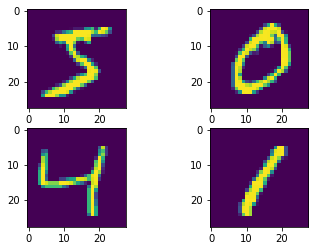

In [3]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[0])
axarr[0,1].imshow(x_train[1])
axarr[1,0].imshow(x_train[2])
axarr[1,1].imshow(x_train[3])
plt.show()

Reshaping Dataset

In [4]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

One-hot encoding

In [5]:
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)

In [6]:
y_train.shape

(60000, 10)

In [7]:
y_test.shape

(10000, 10)

Normalizing and changing pixel range 

In [8]:
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train/255.0
x_test = x_test/255.0

In [9]:
x_train.max()

1.0

In [10]:
x_train.min()

0.0

Building Simple model

In [11]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPool2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

train the model and evaluate the scores

In [12]:
scores, histories = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model1.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2770 - accuracy: 0.9161 - val_loss: 0.1341 - val_accuracy: 0.9586
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1160 - accuracy: 0.9656 - val_loss: 0.0830 - val_accuracy: 0.9752
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0788 - accuracy: 0.9767 - val_loss: 0.0674 - val_accuracy: 0.9784
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0590 - accuracy: 0.9827 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0469 - accuracy: 0.9865 - val_loss: 0.0539 - val_accuracy: 0.9819
Epoch 6/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0391 - accuracy: 0.9887 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.0494 - val_accuracy:

In [13]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

Accuracy: mean=98.606 std=0.047, n=5


Using Batch Normalization model 2

In [14]:
def define_model_batchnorm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model2 =define_model_batchnorm()

In [17]:
scores2, histories2 = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model2.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores2.append(acc)
    histories2.append(history)

Epoch 1/10
469/469 [==============================] - 30s 64ms/step - loss: 0.1464 - accuracy: 0.9577 - val_loss: 0.1109 - val_accuracy: 0.9735
Epoch 2/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0486 - accuracy: 0.9866 - val_loss: 0.0478 - val_accuracy: 0.9852
Epoch 3/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0294 - accuracy: 0.9925 - val_loss: 0.0469 - val_accuracy: 0.9855
Epoch 4/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0123 - accuracy: 0.9980 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0081 - accuracy: 0.9991 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0394 - val_accuracy:

In [19]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores2)*100, np.std(scores2)*100, len(scores2)))

Accuracy: mean=98.870 std=0.073, n=5
